# Explore here

In [79]:
import pandas as pd 

train_data = pd.read_csv('../data/processed/data_train.csv')
test_data = pd.read_csv('../data/processed/data_test.csv')

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46.0,1


Define my target and features

In [80]:
X_train = train_data.drop("Outcome", axis = 1)
y_train = train_data.Outcome
X_test = test_data.drop("Outcome", axis = 1)
y_test = test_data.Outcome

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

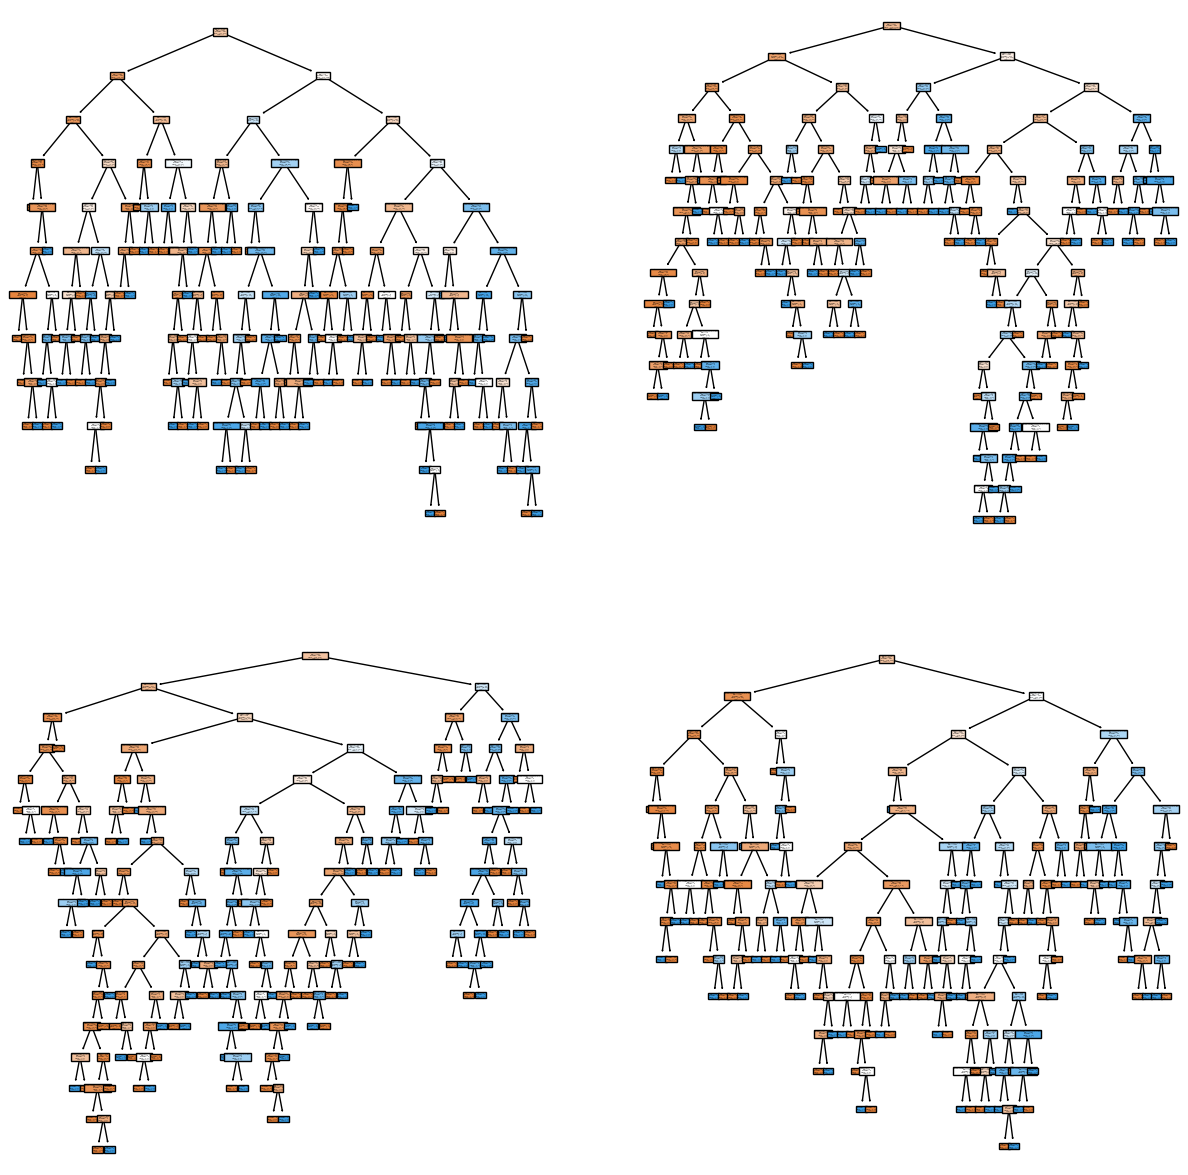

In [82]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

n_estimators: number of decision trees in the random forest. It represents the number of trees in the forest
we chose 60 decision trees

In [83]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [84]:
from sklearn.metrics import accuracy_score

print('accuracy score: ', accuracy_score(y_test, y_pred))

accuracy score:  0.7207792207792207
